<h1 dir=rtl color='blue'>
          מבחן מבוא למדעי נתוני עתק (מדמ"ח) - מועד א' (50 נק')  
</h1>

In [513]:

#@markdown ---
#@markdown ### פרטי הסטודנט:
Full_Name = "Guy Berger " #@param {type:"string"}
ID = "---" #@param {type:"string"}
Depatment = "Computer Science" #@param ["יש  ","Computer Science"]
Year = "Second" #@param ["מהי שנת הלימוד שלך?","Second", "Third", "Fourth"]

#@markdown ---


<h1 dir=rtl color='blue'>
הוראות הגשה
</h1>
<h3 dir=rtl color='blue'>
1. שמרו העתק של קובץ מחברת זו למחשבכם (כפי שעשיתם במעבדות ובמטלות הבית) ועבדו עליו.</h3>
<h3 dir=rtl color='blue'>
2. עליכם להגיש את קובץ המחברת (בסיומת ipynb) למערכת ההגשה הייעודית.</h3>
<h3 dir=rtl color='blue'>
3. שימו לב שתשובות לשאלות בהן התבקשתם לכתוב תשובה (ולא להריץ קוד) יש לכתוב בתור הערה (לשים # לפני כל משפט) או בתא במיועד לטקסט במקום בתא קוד
<h3 dir=rtl color='blue'>
בהצלחה!!!
</h3>
<h1 dir=rtl color='blue'>
חלק א'</h1>
<h3 dir=rtl color='blue'>
בחלק זה של הבחינה תשתמשו בקובץ שמכיל מידע על בתים בפריז
</h3>
<h3 dir=rtl color='blue'>
אתם מתבקשים לנתח את הנתונים ולכתוב את המודל הטוב ביותר בהתאם למידע שתקבלו בהמשך על מבנה הדאטה סט</h3>


<h3 dir=rtl color='blue'>
הריצו וקראו את 4 התאים הבאים.

 בהצלחה</h3>

In [514]:
import pandas as pd
import numpy as np
import datetime

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #more common and simple use
import plotly.graph_objects as go #work moslty on graph objects (more heavy and dynamic) easier to control

In [515]:
paris_df = pd.read_csv('https://raw.githubusercontent.com/UrielBender/Data_for_students/main/ParisHousingClass.csv')

In [516]:
paris_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,NaN,1,63.0,9373.0,3.0,NaN,2005,1,4313,9005,956,0,7
1,80771,39,NaN,1,98.0,39381.0,8.0,NaN,2015,0,3653,2436,128,1,2
2,55712,58,NaN,1,19.0,34457.0,6.0,NaN,2021,0,2937,8852,135,1,9
3,32316,47,NaN,0,6.0,27939.0,10.0,NaN,2012,1,659,7141,359,0,3
4,70429,19,NaN,1,90.0,38045.0,3.0,NaN,1990,0,8435,2429,292,1,4


In [517]:
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            9307 non-null   float64
 3   hasPool            10000 non-null  int64  
 4   floors             8207 non-null   float64
 5   cityCode           7917 non-null   float64
 6   cityPartRange      7912 non-null   float64
 7   numPrevOwners      9016 non-null   float64
 8   made               10000 non-null  int64  
 9   hasStormProtector  10000 non-null  int64  
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  int64  
 14  hasGuestRoom       10000 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 1.1 MB


<h3 dir=rtl color='blue'>
<b>עמודות הטבלה
</h3>
<h3 dir=rtl color='blue'>

* **squareMeters**	- גודל השטח הבנוי
*  **NumberOfRooms** - מכילה את מספר החדרים בכל בית
*  **HasYard** - האם לבית יש חצר
*  **Haspool** - האם לבית יש בריכה
*  **Floors** - כמות הקומות של הבית
*  **CityCode** - עמודה שמכילה את המיקוד של הבית
* **CityPartRange** -  עמודה שאומרת באיזה רובע בעיר הבית ממוקם
* **numPrevOwenrs** - מספר הבעלים הקודמים
* **made** - שנת הבנייה של הבית
* **hasStormProtector** - האם לבית יש מקלט סופות
* **basement** - גודל המרתף של הבית במ"ר
* **attic** - גודל עליית הגג של הבית
* **grage** - גודל החנייה של הבית
* **hasStorageRoom** - האם יש בבית חדר ארונות
* **hasGuestRoom** - מספר חדרי האורחים בבית
</h3>

<h3 dir=rtl>
<b>שאלה 1 - טיפול בערכים חסרים (10 נקודות) 
</h3>
<h3 dir=rtl color='blue'>
ענו על כל אחד מהסעיפים הבאים בתא נפרד - יש להציג את הפתרון בכל תא. 
<ol>
<li>מהו מספר השורות עם ערכים חסרים? ומהו מספר השורות והעמודות הכולל בטבלה? (2 נקודות)</li>
<li>הציגו את תוכן השורות הללו (כטבלה) במסך. (2 נקודות)</li>
<li>מלאו את הערכים החסרים באופן הבא  (הדפיסו את אורך הטבלה לפני ואחרי ההסרה) : (4 נקודות)</li>
<ol> 
<li> בעמודה numPrevOwenrs - מלאו את החציון במקום הערכים החסרים
<li> בעמודה hasYard - מלאו את הערכים החסרים לפי הערך הפחות שכיח בעמודה (פתרון גנארי)
<li> הסירו את כל שאר השורות בהם יש ערכים חסרים
</ol>

<li>יש לאתחל את מספור הטבלה ולדאוג שהערכים בעמודת האינדקס רציפים - הדפיסו למסך את השורה האחרונה בטבלה לאחר הפעולה. (2 נקודות)</li>
</ol>
</h3>

In [518]:
#1.1 ענו בתא זה על סעיף
paris_df.isnull().any(axis=0).sum()

5

In [519]:
paris_df.shape

(10000, 15)

In [520]:
#1.2 ענו בתא זה על סעיף
paris_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,NaN,1,63.0,9373.0,3.0,NaN,2005,1,4313,9005,956,0,7
1,80771,39,NaN,1,98.0,39381.0,8.0,NaN,2015,0,3653,2436,128,1,2
2,55712,58,NaN,1,19.0,34457.0,6.0,NaN,2021,0,2937,8852,135,1,9
3,32316,47,NaN,0,6.0,27939.0,10.0,NaN,2012,1,659,7141,359,0,3
4,70429,19,NaN,1,90.0,38045.0,3.0,NaN,1990,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0.0,1,5.0,73133.0,7.0,6.0,2009,1,9311,1698,218,0,4
9996,44403,29,1.0,1,12.0,34606.0,9.0,4.0,1990,1,9061,1742,230,0,0
9997,83841,3,0.0,0,69.0,80933.0,10.0,10.0,2005,1,8304,7730,345,1,9
9998,59036,70,0.0,0,96.0,55856.0,1.0,3.0,2010,1,2590,6174,339,1,4


In [521]:
#1.3 ענו בתא זה על סעיף
paris_df['numPrevOwners'] = paris_df['numPrevOwners'].fillna(paris_df['numPrevOwners'].median())
paris_df['numPrevOwners']

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
9995     6.0
9996     4.0
9997    10.0
9998     3.0
9999    10.0
Name: numPrevOwners, Length: 10000, dtype: float64

In [522]:
s = paris_df['hasYard'].value_counts()
lowest = s.index[-1]
paris_df['hasYard'] = lowest
paris_df


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0.0,1,63.0,9373.0,3.0,5.0,2005,1,4313,9005,956,0,7
1,80771,39,0.0,1,98.0,39381.0,8.0,5.0,2015,0,3653,2436,128,1,2
2,55712,58,0.0,1,19.0,34457.0,6.0,5.0,2021,0,2937,8852,135,1,9
3,32316,47,0.0,0,6.0,27939.0,10.0,5.0,2012,1,659,7141,359,0,3
4,70429,19,0.0,1,90.0,38045.0,3.0,5.0,1990,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0.0,1,5.0,73133.0,7.0,6.0,2009,1,9311,1698,218,0,4
9996,44403,29,0.0,1,12.0,34606.0,9.0,4.0,1990,1,9061,1742,230,0,0
9997,83841,3,0.0,0,69.0,80933.0,10.0,10.0,2005,1,8304,7730,345,1,9
9998,59036,70,0.0,0,96.0,55856.0,1.0,3.0,2010,1,2590,6174,339,1,4


In [523]:
paris_df.dropna(how='any', inplace=True)
paris_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0.0,1,63.0,9373.0,3.0,5.0,2005,1,4313,9005,956,0,7
1,80771,39,0.0,1,98.0,39381.0,8.0,5.0,2015,0,3653,2436,128,1,2
2,55712,58,0.0,1,19.0,34457.0,6.0,5.0,2021,0,2937,8852,135,1,9
3,32316,47,0.0,0,6.0,27939.0,10.0,5.0,2012,1,659,7141,359,0,3
4,70429,19,0.0,1,90.0,38045.0,3.0,5.0,1990,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0.0,1,5.0,73133.0,7.0,6.0,2009,1,9311,1698,218,0,4
9996,44403,29,0.0,1,12.0,34606.0,9.0,4.0,1990,1,9061,1742,230,0,0
9997,83841,3,0.0,0,69.0,80933.0,10.0,10.0,2005,1,8304,7730,345,1,9
9998,59036,70,0.0,0,96.0,55856.0,1.0,3.0,2010,1,2590,6174,339,1,4


In [524]:
#1.4 ענו בתא זה על סעיף
paris_df.reset_index(inplace=True, drop=True)
paris_df.tail(1)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
5055,1440,84,0.0,0,49.0,18412.0,6.0,10.0,1994,0,8485,2024,278,1,6


<h3 dir=rtl>
<b>שאלה 2- סטטיסטיקות וחיתוך הטבלה (6 נקודות) 
</h3>
<h3 dir=rtl color='blue'>
ענו על כל אחד מהסעיפים הבאים בתא נפרד - יש להציג את הפתרון בכל תא. 
<ol>
<li>הציגו את הסטטיסטיקות הבאות על הדאטה יש להשתמש בפונקציה המתאימה לכל סעיף (2 נקודות)</li>
<ol>
<li> סטיית תקן של כלל העמודות
<li> מינימום ומקסימום על עמודת squareMeters
<li> רבעון שלישי (0.75) של עמודת squareMeters

</ol>
<br>
<li>צרו טבלה חדשה (data frame) שמכילה רק את העמודות (SquareMeters,numberOfrooms, hasPool,HasYard,numPrevOwners,attic,hasGuestRoom,Price,Category). (2 נקודות) </li>


<li>לאחר חיתוך הטבלה שנו את השם של העמודות כך ששמם יתחיל באות גדולה. (2 נקודות)

</ol>
<br>
הדפיסו את 5 השורות הראשונות כדי לראות את השינוי
</h3>

In [525]:
#2.1.1 ענו בתא זה על סעיף
paris_df.std() 

squareMeters         28806.569985
numberOfRooms           28.589644
hasYard                  0.000000
hasPool                  0.500027
floors                  28.788527
cityCode             29030.354686
cityPartRange            2.876668
numPrevOwners            2.648676
made                     9.255439
hasStormProtector        0.499874
basement              2885.658330
attic                 2901.093838
garage                 263.286650
hasStorageRoom           0.500048
hasGuestRoom             3.168704
dtype: float64

In [526]:
#2.1.2 ענו בתא זה על סעיף
print(paris_df['squareMeters'].min())
print(paris_df['squareMeters'].max())

89
99999


In [527]:
#2.1.2 ענו בתא זה על סעיף
new_paris_df = paris_df.loc[:, ['squareMeters',	'numberOfRooms', 'hasYard',	'hasPool', 'numPrevOwners', 'attic', 'hasGuestRoom']]
new_columns = {}
for col in new_paris_df.columns:
    new_columns[col] = col.capitalize()

new_paris_df = new_paris_df.rename(columns=new_columns)
new_paris_df.head(5)

,Squaremeters,Numberofrooms,Hasyard,Haspool,Numprevowners,Attic,Hasguestroom
0,75523,3,0.0,1,5.0,9005,7
1,80771,39,0.0,1,5.0,2436,2
2,55712,58,0.0,1,5.0,8852,9
3,32316,47,0.0,0,5.0,7141,3
4,70429,19,0.0,1,5.0,2429,4


In [528]:
#2.1.3 ענו בתא זה על סעיף


In [529]:
#2.2 ענו בתא זה על סעיף
paris_df.drop(['floors', 'cityCode', 'cityPartRange', 'made', 'hasStormProtector', 'basement', 'garage'], axis=1, inplace=True) 
paris_df

,squareMeters,numberOfRooms,hasYard,hasPool,numPrevOwners,attic,hasStorageRoom,hasGuestRoom
0,75523,3,0.0,1,5.0,9005,0,7
1,80771,39,0.0,1,5.0,2436,1,2
2,55712,58,0.0,1,5.0,8852,1,9
3,32316,47,0.0,0,5.0,7141,0,3
4,70429,19,0.0,1,5.0,2429,1,4
...,...,...,...,...,...,...,...,...
5051,1726,89,0.0,1,6.0,1698,0,4
5052,44403,29,0.0,1,4.0,1742,0,0
5053,83841,3,0.0,0,10.0,7730,1,9
5054,59036,70,0.0,0,3.0,6174,1,4


In [530]:
#2.3 ענו בתא זה על סעיף

<h1 dir=rtl color='blue'>
חלק ב'</h1>
<h3 dir=rtl color='blue'>
בחלק זה אתם נדרשים לבצע מיזוג של טבלת הבתים בפריז עם טבלה נוספת. 
לרשותכם בחירה בין 2 טבלאות, טבלה אחת המכילה 2 קטגוריות של בתים "יוקרתי" או בסיסי וטבלה אחת המכילה את מחירי הבתים.
אין לכם חובה להשתמש ב 2 הטבלאות, מזגו את אחת הטבלאות לפי עמודה משותפת. </h3>
<h3 dir=rtl color='blue'>
לרשותכם 2 הטבלאות זמינות להורדה מהשרת - הריצו את התאים הבאים בכדיי לייבא אותם ולראות את הנתונים ולאחר מכן המשיכו לענות על השאלות הבאות</h3>

In [531]:
paris_df_2 = pd.read_csv('https://raw.githubusercontent.com/UrielBender/Data_for_students/main/ParisHousingClass_2.csv')

In [532]:
prices = pd.read_csv('https://raw.githubusercontent.com/UrielBender/Data_for_students/main/Paris_housing_price.csv')
categories = pd.read_csv("https://raw.githubusercontent.com/UrielBender/Data_for_students/main/Paris_housing_category.csv")

In [533]:
categories.head(2)

,SquareMeters,category
0,75057,Basic
1,70919,Luxury


In [534]:
prices.head(2)

,SquareMeters,price
0,75057,7518049.7
1,70919,7101031.7


<h3 dir=rtl>
<b>שאלה 3 - מיזוג טבלאות (5 נקודות)
</h3>
<h3 dir=rtl color='blue'>
ענו על כל אחד מהסעיפים הבאים בתא נפרד - יש להציג את הפתרון  
<ol>
<li>מזגו לתוך טבלת paris_df את טבלת category_df או prices_df כך שתוסף עמודה  לטבלת paris_df (מזגו את הטבלאות לפי העמודה SquareMeters ) כך שלא יהיו ערכים חסרים בטבלה. הציגו את 10 השורות הראשונות בטבלה המתקבלת.(3 נקודות)</li>
<li>הדפיסו את מספר השורות והעמודות של הדאטה ובדקו האם באמת לא קיימים ערכים חסרים בטבלה כפי שהתבקשתם בסעיף הקודם
(2 נקודות)</li>

</ol>
</h3>

In [535]:
#ענו בתא זה על סעיף 3.1
paris_df_2 = pd.merge(paris_df_2, categories, on='SquareMeters', how='inner')
paris_df_2.head(10)

,SquareMeters,NumberOfRooms,HasYard,NumPrevOwners,Attic,HasGuestRoom,category
0,75057,63,1.0,5.0,6084,6,Basic
1,70919,11,1.0,10.0,1290,10,Luxury
2,29710,96,1.0,8.0,4716,2,Basic
3,61798,46,0.0,1.0,8006,0,Basic
4,6313,53,1.0,6.0,8642,0,Basic
5,60375,50,0.0,9.0,5057,9,Basic
6,69421,45,0.0,2.0,4985,9,Basic
7,89086,4,0.0,10.0,2972,9,Basic
8,68603,60,0.0,9.0,7023,2,Luxury
9,12448,59,0.0,2.0,4762,0,Basic


In [536]:
#ענו בתא זה על סעיף 3.1
print(paris_df_2.shape)

(4104, 7)


In [537]:
#ענו בתא זה על סעיף 3.2
paris_df_2.isnull().sum()

SquareMeters     0
NumberOfRooms    0
HasYard          0
NumPrevOwners    0
Attic            0
HasGuestRoom     0
category         0
dtype: int64

<h3 dir=rtl>
<b>שאלה 4 - Visualizaion (4 נקודות)
</h3>
<h3 dir=rtl color='blue'>
ענו על כל אחד מהסעיפים הבאים בתא נפרד - יש להציג את הפתרון בכל תא.  
<h3 dir=rtl color='blue'>
יש לעבוד עם הטבלה הממוזגת!! 
<h3 dir=rtl color='blue'>
אין צורך להוסיף כותרות כלשהן לגרפים שתיצרו בשאלות הבאות!!!

הטבלאות הממוזגות ניתנות לקריאה בתא הבא לטובת מי שלא הספיק\סיים את הסעיף הקודם
<ol>
<li>
הציגו גרף עמודות / היסטוגרמה (bar chart) שמציג את כמות הבתים שבהם יש חצר ואלו שלא והציגו את האחוז שלהם מתוך הסה"כ מעל כל עמודה בגרף
(2 נקודות)</li>

<li> צרו גרף קופסא (box plot) לעמודה NumPrevOwners (2 נקודות)
</ol>
</h3>

In [538]:
paris_price_merge_df = pd.read_csv('https://raw.githubusercontent.com/UrielBender/Data_for_students/main/Paris_housing_price_merged.csv')
paris_category_merge_df= pd.read_csv('https://raw.githubusercontent.com/UrielBender/Data_for_students/main/Paris_housing_category_merged.csv')

In [539]:
paris_category_merge_df

,SquareMeters,NumberOfRooms,HasYard,NumPrevOwners,Attic,HasGuestRoom,category
0,75057,63,1.0,5.0,6084,6,Basic
1,70919,11,1.0,10.0,1290,10,Luxury
2,29710,96,1.0,8.0,4716,2,Basic
3,61798,46,0.0,1.0,8006,0,Basic
4,6313,53,1.0,6.0,8642,0,Basic
...,...,...,...,...,...,...,...
4099,1726,89,0.0,6.0,1698,4,Basic
4100,44403,29,1.0,4.0,1742,0,Basic
4101,83841,3,0.0,10.0,7730,9,Basic
4102,59036,70,0.0,3.0,6174,4,Basic


In [540]:
#ענו בתא זה על סעיף 4.1
HasYard = paris_category_merge_df.HasYard.value_counts()
HasYard
percentage = [str(round(i/HasYard.sum()*100,2)) +'%' for i in HasYard ]
percentage
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['HasYard', 'NoYard'],
    y=HasYard,
    marker_color=['lightsalmon','green'],
    text=percentage,
    textposition='outside',
)) 
fig.update_layout()
fig.show()


#סתם אם אני רוצה לבדוק את עצמי אם הגרף יצא הגיוני, אני יכול פשוט לבדוק לכמה אנשים יש באמת גינה ולכמה אין
# התוצאות אכן מראות של-2048 אנשים אין גינה ול-2020 יש גינה מה שאומר שהגיוני שיצא לי 50 50 בערך
# HasYard = paris_df_2['HasYard'].value_counts()
# print(HasYard)
# num_with_yard = HasYard.loc[1]
# num_without_yard = HasYard.loc[0]
# print("Number of people with yard:", num_with_yard)
# print("Number of people without yard:", num_without_yard)

In [541]:
#ענו בתא זה על סעיף 4.2
fig = go.Figure()
fig.add_trace(go.Box(name='Number of owners', y=paris_category_merge_df.NumPrevOwners, boxmean=True))
fig.update_layout(
    width=600
)
fig.show()

<h3 dir=rtl>
<b>שאלה 5 - Fetures Selection (9 נקודות)
</h3>
<h3 dir=rtl color='blue'>
יש לעבוד עם טבלת paris_price_merge_df / paris_category_merge_df בלבד!!
<ol>
<li>
הסירו את העמודות שמכילות מחרוזות (string) ואת העמודות המיותרות (naive feature selection) אם יש כאלה במידה ואין תרשמו במידה ובחרתם למזג את טבלת הקטגוריות שימו לב כי עליכם להחליף את המחרוזות בערך אחר ובמידה ובחרתם במחיר חלקו את ערכי העמודה ב100000. (2 נקודות)</li>
<li>הציגו במפת חום (heatmap) את טבלת הקורלציה של הטבלה הממוזגת. (2 נקודות)</li>  
<li>הגדירו את X להיות המשתנים הבלתי תלויים ואת y כמשתנה התלוי. (המודל אמור לנבא מחיר או קטגוריה בהתאם לבחירתכם בסעיפים הקודמים) 
 נרמלו את ערכי הדאטה שלכם במידת הצורך (2 נקודות)
<li> השתמשו במבחן סטטיסטי להורדת פיצ'רים, מבין השניים שנלמדו במעבדות והסירו את   העמודה (feature) שדורגה במקום האחרון במבחן.
במידה ובחרתם בעמודת המחיר שימו לב כי מבחן chi2 הוא מבחן לקלסיפיקציה
. (3 נקודות)
</h3>

In [542]:
#ענו בתא זה על סעיף 5.1
# paris_category_merge_df['Category'] = pd.get_dummies(paris_category_merge_df['category'], drop_first=True)
# paris_category_merge_df.drop('category', axis=1, inplace=True)
# paris_category_merge_df
# גם עובד אבל פתרון של הצ'אט, נראה יותר מסורבל, מה שכן שם העמודה הוא קטגוריה ואז 0 זה בסיסי ו-1 זה יוקרה מה שנראה יותר טוב ממה שיצא פה

dummies = pd.get_dummies(paris_category_merge_df.category,drop_first=True)
paris_category_merge_df=pd.concat([paris_category_merge_df,dummies],axis=1)
paris_category_merge_df.drop('category', axis=1, inplace=True)
paris_category_merge_df

,SquareMeters,NumberOfRooms,HasYard,NumPrevOwners,Attic,HasGuestRoom,Luxury
0,75057,63,1.0,5.0,6084,6,0
1,70919,11,1.0,10.0,1290,10,1
2,29710,96,1.0,8.0,4716,2,0
3,61798,46,0.0,1.0,8006,0,0
4,6313,53,1.0,6.0,8642,0,0
...,...,...,...,...,...,...,...
4099,1726,89,0.0,6.0,1698,4,0
4100,44403,29,1.0,4.0,1742,0,0
4101,83841,3,0.0,10.0,7730,9,0
4102,59036,70,0.0,3.0,6174,4,0


In [543]:
#ענו בתא זה על סעיף 5.2
corr_df = paris_category_merge_df.corr()

fig = go.Figure()
fig.add_traces(go.Heatmap(
    z = corr_df,
    x = corr_df.index,  
    y = corr_df.index,
))
fig.update_layout({
    'title':"Heart Dataframe Correlation Heatmap"
})


fig.show()

In [544]:
#ענו בתא זה על סעיף 5.3

y = paris_category_merge_df.Luxury
X = paris_category_merge_df[['SquareMeters', 'NumberOfRooms', 'HasYard', 'NumPrevOwners', 'Attic', 'HasGuestRoom']]
X

,SquareMeters,NumberOfRooms,HasYard,NumPrevOwners,Attic,HasGuestRoom
0,75057,63,1.0,5.0,6084,6
1,70919,11,1.0,10.0,1290,10
2,29710,96,1.0,8.0,4716,2
3,61798,46,0.0,1.0,8006,0
4,6313,53,1.0,6.0,8642,0
...,...,...,...,...,...,...
4099,1726,89,0.0,6.0,1698,4
4100,44403,29,1.0,4.0,1742,0
4101,83841,3,0.0,10.0,7730,9
4102,59036,70,0.0,3.0,6174,4


In [545]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X,y)
feat_importances_df = pd.DataFrame({'feature_importance':model.feature_importances_}, index=X.columns)
feat_importances_df=feat_importances_df.sort_values(by='feature_importance', ascending=False)
feat_importances_df
# שני המדדים שנלמדו זה חי בריבוע וxgbosst
# אני משתמש בחי בריבוע כי הוא מדד של קלסיפיקציה ופה אני מנבא אם הבית שייך לקטגוריית יוקרה או לא

,feature_importance
HasYard,0.800151
SquareMeters,0.045030
HasGuestRoom,0.041350
Attic,0.038809
NumberOfRooms,0.037547
NumPrevOwners,0.037114


In [546]:
# ענו בתא זה על סעיף 5.4
from sklearn.feature_selection import SelectKBest , chi2
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X, y)
chi_feature = chi_selector.get_feature_names_out()
print("The top 6 top scored features are ", chi_feature)
chi_selector = SelectKBest(chi2, k=len(X.columns))
chi_selector.fit(X, y)

scores = pd.Series(chi_selector.scores_.tolist()) 
p_values = pd.Series(chi_selector.pvalues_.tolist()) 

selected_df = pd.DataFrame({'univariate_score':scores, 'p_values':p_values})
selected_df.set_index(X.columns, inplace=True, drop=True)
univariate_df = selected_df.sort_values(by='univariate_score', ascending=False)
univariate_df             

# paris_category_merge_df.drop('HasGuestRoom', axis=1, inplace=True)
# paris_category_merge_df

The top 6 top scored features are  ['SquareMeters' 'NumberOfRooms' 'HasYard' 'NumPrevOwners' 'Attic'
 'HasGuestRoom']


,univariate_score,p_values
SquareMeters,2790.142606,0.000000e+00
Attic,496.531233,5.403923e-110
HasYard,242.434797,1.158302e-54
NumberOfRooms,30.802752,2.856325e-08
NumPrevOwners,2.347368,1.254948e-01
HasGuestRoom,0.046620,8.290525e-01


<h3 dir=rtl>
<b>שאלה 6 - ML Model (8 נקודות)
</h3>
<h3 dir=rtl color='blue'>
 שימו לב - אין צורך בפלט כלשהו בשאלה זו!!!!
<h4 dir=rtl color='blue'>
יש לעבוד עם החלוקה לX וy שעשיתם בסעיף הקודם
<br>
<ol>
<li>
חלקו את הטבלה ל70% סט אימון ו30% סט מבחן. בפרמטר random_state עליכם להכניס את מספר תעודת הזהות שלכם ונרמלו את הדאטה שלכם במידת הצורך.(3 נקודות)</li>

<li>
בנו מודל המנבא price או category בהתאם לבחירתכם בסעיפים הקודמים אתם מתבקשים לבחור בעצמכם מודל מתאים לפתרון הבעיה מבין המודלים שנלמדו במעבדות. אמנו את המודל שבניתם. 
(3 נקודות)
</li>
<li> הציגו את מדד הacuuracy על סט האימון או רשמו מה הוא הפיצ'ר הטוב ביותר לחיזוי מחיר ולמה במידה ובחרתם לחזות מחיר. (2 נקודות)

</h4>

In [547]:
#ענו בתא זה על סעיף 6.1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=313573404)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)

In [548]:
#ענו בתא זה על סעיף 6.2
from sklearn.linear_model import LogisticRegression

#create the model object and fit(train) the data
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

#get the probability and prediction
probability = logmodel.predict_proba(X_train)
prediction = logmodel.predict(X_train)
probability

#create a train result data frame
y_train_prob_0 = pd.Series(probability[:,0], name ='probability_0', index=y_train.index)
y_train_prob_1 = pd.Series(probability[:,1], name ='probability_1', index=y_train.index)
y_train_pred   = pd.Series(prediction      , name ='prediction'   , index=y_train.index)

train_results = pd.DataFrame(data={'probability_0':y_train_prob_0, 'probability_1':y_train_prob_1,'prediction':y_train_pred, 'actual':y_train})
train_results

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,probability_0,probability_1,prediction,actual
757,0.874676,0.125324,0,0
145,0.917173,0.082827,0,1
1230,0.840625,0.159375,0,0
165,0.889480,0.110520,0,0
756,0.975018,0.024982,0,0
...,...,...,...,...
2782,0.652415,0.347585,0,0
771,0.950588,0.049412,0,0
135,0.677697,0.322303,0,1
1311,0.894498,0.105502,0,0


In [549]:
#ענו בתא זה על סעיף 6.3
correct_rows = len(train_results.loc[train_results.prediction == train_results.actual])
correct_rows
#precentage of correct predictions
accuracy = round(correct_rows/len(train_results),2)
print(str(accuracy))

0.86


<h3 dir=rtl>
<b>שאלה 7 - Model Evaluation (8 נקודות)
</h3>
<h3 dir=rtl color='blue'>
ענו על כל אחד מהסעיפים הבאים בתא נפרד - יש להציג את הפתרון בכל תא.  
<ol>
<li>
 נבאו (predict) את עמודת מעבר המבחן של סט המבחן(Test set) באמצעות המודל שבניתם בשאלה הקודמת.(2 נקודות)</li>

<li>
הציגו את מטריצת הערפול (confusion matrix) על פי תוצאות הניבוי של המודל או את גרף השארים(Residual) של מחירי הבתים.
(2 נקודות)</li>

<li>
הציגו את הClassification report  או את ה MAE,MSE,RMSE(אם בחרתם לחזות מחיר לאימון ולמבחן)על פי התוצאות שקיבלתם.
(2 נקודות)</li>
<li>לאחר שהצגתם את תוצאות המודל לנשיא רופין, הוא ציין שהוא לא הבין בצורה טובה את ההבדלים בין המדדים F1 ו- precision הסבירו במילים שלכם על ההבדל בין המדדים כך שהנשיא יוכל להבין את ההבדל בצורה הקצרה והבהירה ביותר. (אין צורך לפרט יתר על המידה) יש לכתוב את תשובתכם בתא מסוג טקסט או בתא קוד אבל בהערה (שימוש ב# בתחילת כל משפט)</li>
(2 נקודות)</h3>

In [552]:
#ענו בתא זה על סעיף 7.1
probability = logmodel.predict_proba(X_test)
prediction = logmodel.predict(X_test) 

y_test_prob_0 =pd.Series(probability[:,0], name='probability_0', index=y_test.index)
y_test_prob_1 =pd.Series(probability[:,1], name='probability_1', index=y_test.index)
y_test_pred = pd.Series(prediction, name='prediction', index=y_test.index)

test_results = pd.DataFrame(data={'probability_0':y_test_prob_0, 'probability_1':y_test_prob_1,'prediction':y_test_pred, 'actual':y_test})
test_results

,probability_0,probability_1,prediction,actual
1977,0.719095,0.280905,0,0
1143,0.967915,0.032085,0,0
1219,0.828837,0.171163,0,0
2578,0.917746,0.082254,0,0
2454,0.834960,0.165040,0,1
...,...,...,...,...
1044,0.706947,0.293053,0,0
54,0.921229,0.078771,0,0
3845,0.966142,0.033858,0,0
4001,0.595136,0.404864,0,0


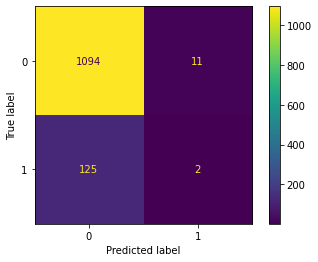

In [555]:
#ענו בתא זה על סעיף 7.2
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
y_test_pred = test_results.prediction
confusion = metrics.confusion_matrix(y_test, y_test_pred)
#slice into four pieces
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

confusion

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion, display_labels=logmodel.classes_)
disp.plot()

In [556]:
#ענו בתא זה על סעיף 7.3
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1105
           1       0.15      0.02      0.03       127

    accuracy                           0.89      1232
   macro avg       0.53      0.50      0.49      1232
weighted avg       0.82      0.89      0.85      1232



In [374]:
#ענו בתא זה על סעיף 7.4
precision - מכל מה שחזינו שמסווגים כיוקרה, כמה אכן מסווגים ככאלה
F1 - מאזן בין מדד הריקול ומדד הפרסיזן, במקום ממוצע שלא יעיל

ניתן לענות גם בתא זה על סעיף 7.4 (לחצו לחיצה כפולה כדי לערוך תא זה)


<h3 dir=rtl>
<b>שאלה 8 - BONUS שאלת רשות  (5 נקודות) - תשובה לא נכונה לא תגרום להורדת נקודות  ואין אפשרות לקבל יותר מ-50 נקודות בחלק זה של הבחינה
</h3>
<h4 dir=rtl color='blue'>
חברת נדלן פריזאית החליטה שברצונה לבנות מודל לחיזוי סוגי בתים, האם הבית הוא בסיסי או יוקרתי.
במהלך העבודה הם גילו כי מספר הבתים הבסיסיים גדול בהרבה ממספר הבתים היוקרתיים.
<ol>
<li> איך נקרא מצב זה ומדוע הוא יכול להיות בעייתי? (2 נק')</li>
<li> איך הייתם מציעים לתקן \ לשפר את המודל כדי להימנע ממצב זה? (יש להתייחס בצורה ספציפית לדאטה שעבדנו עליו). (3 נקודות)</li>
</h4>

In [375]:
#ניתן לענות כאן ולכתוב את תשובתכם בהערה
overfitting - נוסיף דוגמאות ונעניש את הפיצרים על ידי פונקציית העלות ועל ידי מציאת טטות מיטביות

או שניתן לענות כאן (בחרו באפשרות הנוחה לכם) 